In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_json('Digital_Music_5.json', lines=True)

In [8]:
reviews_df = pd.DataFrame(df)
reviews_df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5,3.0,True,"06 3, 2013",A2TYZ821XXK2YZ,3426958910,{'Format:': ' Audio CD'},Garrett,"This is awesome to listen to, A must-have for ...",Slayer Rules!,1370217600,NaN
1,5,NaN,True,"10 11, 2014",A3OFSREZADFUDY,3426958910,{'Format:': ' Audio CD'},Ad,bien,Five Stars,1412985600,NaN
2,5,NaN,True,"02 11, 2014",A2VAMODP8M77NG,3426958910,{'Format:': ' Audio CD'},JTGabq,It was great to hear the old stuff again and I...,SLAYER!!!!!!!!!!!!!!!!!!!!!,1392076800,NaN
3,4,3.0,False,"12 7, 2013",AAKSLZ9IDTEH0,3426958910,{'Format:': ' Audio CD'},john F&#039;n doe,well best of's are a bit poison normally but t...,slayer greatest hits! you mean everything righ...,1386374400,NaN
4,5,NaN,True,"06 12, 2016",A3OH43OZJLKI09,5557706259,{'Format:': ' Audio CD'},melinda a goodman,What can I say? This is Casting Crowns!!!This ...,"This is a good, blessing filled",1465689600,NaN


In [9]:
reviews_df.shape

(169781, 12)

In [10]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169781 entries, 0 to 169780
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         169781 non-null  int64  
 1   vote            7611 non-null    float64
 2   verified        169781 non-null  bool   
 3   reviewTime      169781 non-null  object 
 4   reviewerID      169781 non-null  object 
 5   asin            169781 non-null  object 
 6   style           157989 non-null  object 
 7   reviewerName    169776 non-null  object 
 8   reviewText      169623 non-null  object 
 9   summary         169745 non-null  object 
 10  unixReviewTime  169781 non-null  int64  
 11  image           182 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 14.4+ MB


<AxesSubplot:xlabel='overall', ylabel='count'>

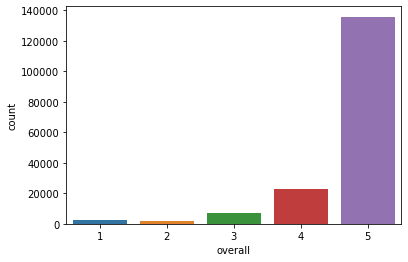

In [11]:
sns.countplot(data = reviews_df, x='overall')

Undersampling

In [20]:
one= reviews_df[reviews_df['overall']==1.0].sample(n=1500)
two= reviews_df[reviews_df['overall']==2.0].sample(n=600)
three = reviews_df[reviews_df['overall']==3.0].sample(n=700)
four = reviews_df[reviews_df['overall']==4.0].sample(n=800)
five = reviews_df[reviews_df['overall']==5.0].sample(n=1500)

In [22]:
undersampled_df = pd.concat([one, two, three, four, five], axis=0)

In [13]:
sample_100K = reviews_df.sample(n=100000, random_state=42)

In [23]:
undersampled_df['overall'].value_counts(dropna=False)

1    1500
5    1500
4     800
3     700
2     600
Name: overall, dtype: int64

<AxesSubplot:xlabel='overall', ylabel='count'>

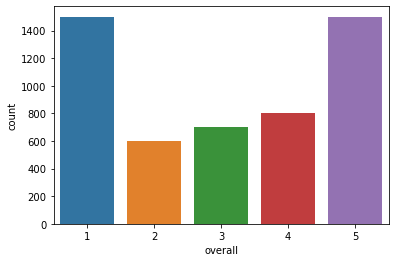

In [24]:
sns.countplot(data=undersampled_df, x='overall')

In [27]:
undersampled_df.to_csv("data/small_corpus.csv", index=False)

In [28]:
sample_100K.to_csv("data/big_corpus.csv", index=False)